## 1.Import libraries

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

## 2.Exploratory Data Analysis

In [162]:
df_fh=pd.read_csv('fetal_health.csv')

In [163]:
print(df_fh.shape)
print(df_fh.columns)

(2126, 22)
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [164]:
df_fh.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### 2.1 Overall of dataset
Bộ dữ liệu này chứa 2126 bản ghi và 21 thuộc tính  được trích xuất từ ​​các bài kiểm tra Điện tâm đồ và 1 biến phân loại.Dưới đây là mô tả về các loại thuộc tính trong dữ liệu của bạn:

- baseline value : Đây là giá trị cơ bản của nhịp tim thai nhi, thường được đo trong khoảng thời gian cố định.

- accelerations : Đây là sự gia tốc của nhịp tim thai nhi, thường là các tăng đột ngột và ngắn hạn.

- fetal_movement: Thuộc tính này đo lường sự chuyển động của thai nhi, có thể liên quan đến hoạt động nhiệt độ của thai nhi.

- uterine_contractions: Sự co bóp của tử cung, một yếu tố quan trọng trong quá trình sinh nở.

- light_decelerations: Giảm tốc nhẹ của nhịp tim thai nhi, thường không gây ra vấn đề lớn cho sức khỏe thai nhi.

- severe_decelerations: Đây là giảm tốc nặng của nhịp tim thai nhi, có thể là dấu hiệu của vấn đề sức khỏe nghiêm trọng.

- prolongued_decelerations: Giảm tốc kéo dài của nhịp tim thai nhi, có thể liên quan đến tình trạng sức khỏe thai nhi.

- abnormal_short_term_variability**: Biến động ngắn hạn không bình thường trong nhịp tim, có thể là dấu hiệu của sự căng thẳng hoặc vấn đề sức khỏe.

- mean_value_of_short_term_variability: Giá trị trung bình của biến động ngắn hạn, có thể cung cấp thông tin về biến động của nhịp tim.

- percentage_of_time_with_abnormal_long_term_variability: Tỷ lệ thời gian có biến động dài hạn không bình thường, có thể là một chỉ số quan trọng về sức khỏe thai nhi.

- mean_value_of_long_term_variability: Giá trị trung bình của biến động dài hạn trong nhịp tim.

- histogram_width: Chiều rộng của histogram, có thể liên quan đến biến động của nhịp tim.

- histogram_min: Giá trị nhỏ nhất trong histogram.

- histogram_max: Giá trị lớn nhất trong histogram.

- histogram_number_of_peaks: Số lượng đỉnh trong histogram.

- histogram_number_of_zeroes: Số lượng điểm không trong histogram.

- histogram_mode: Mode (điểm có tần suất xuất hiện cao nhất) trong histogram.

- histogram_mean: Giá trị trung bình của histogram.

- histogram_median: Median (giá trị giữa) của histogram.

- histogram_variance: Phương sai của histogram.

- histogram_tendency: X|u hướng của histogram.

- fetal_health: Trạng thái sức khỏe của thai nhi .

### 2.2 Structure of dataset

In [165]:
df_fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Bộ dữ liệu này có 22 cột thuộc kiểu dữ liệu float(số thực)

### 2.3 Summary of statistic

In [166]:
df_fh.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### 2.4 Data Visualization

#### 2.4.1 The frequency of appearance of values ​​in the attribute through the hist chart

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

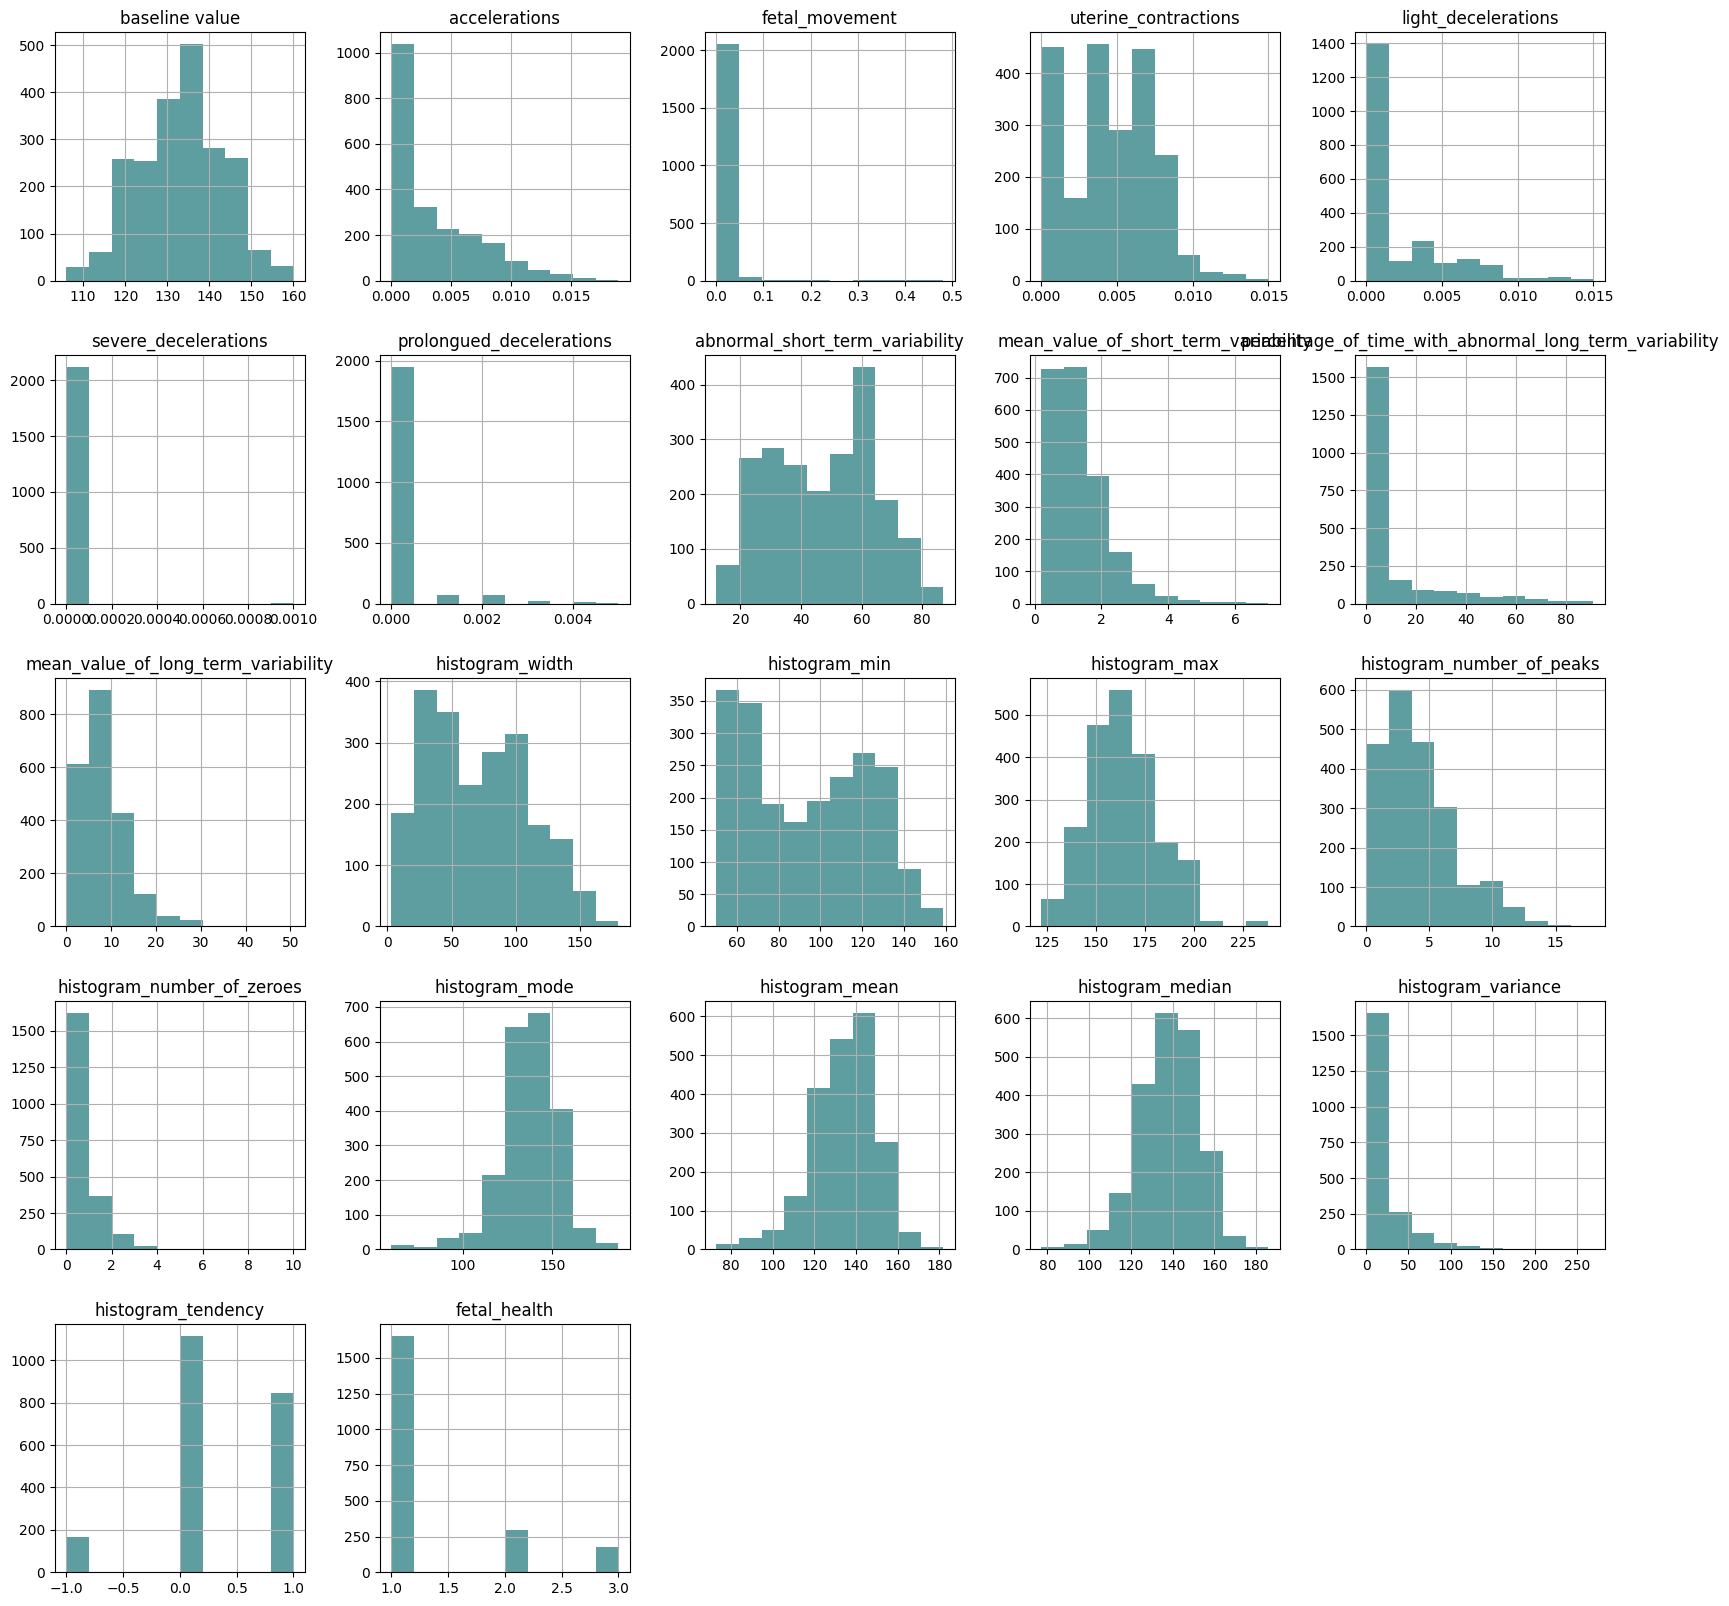

In [167]:
df_fh.hist(figsize=(20,20),color='#5F9EA0')

### 2.4.2 Correlation Between Variables

<Axes: >

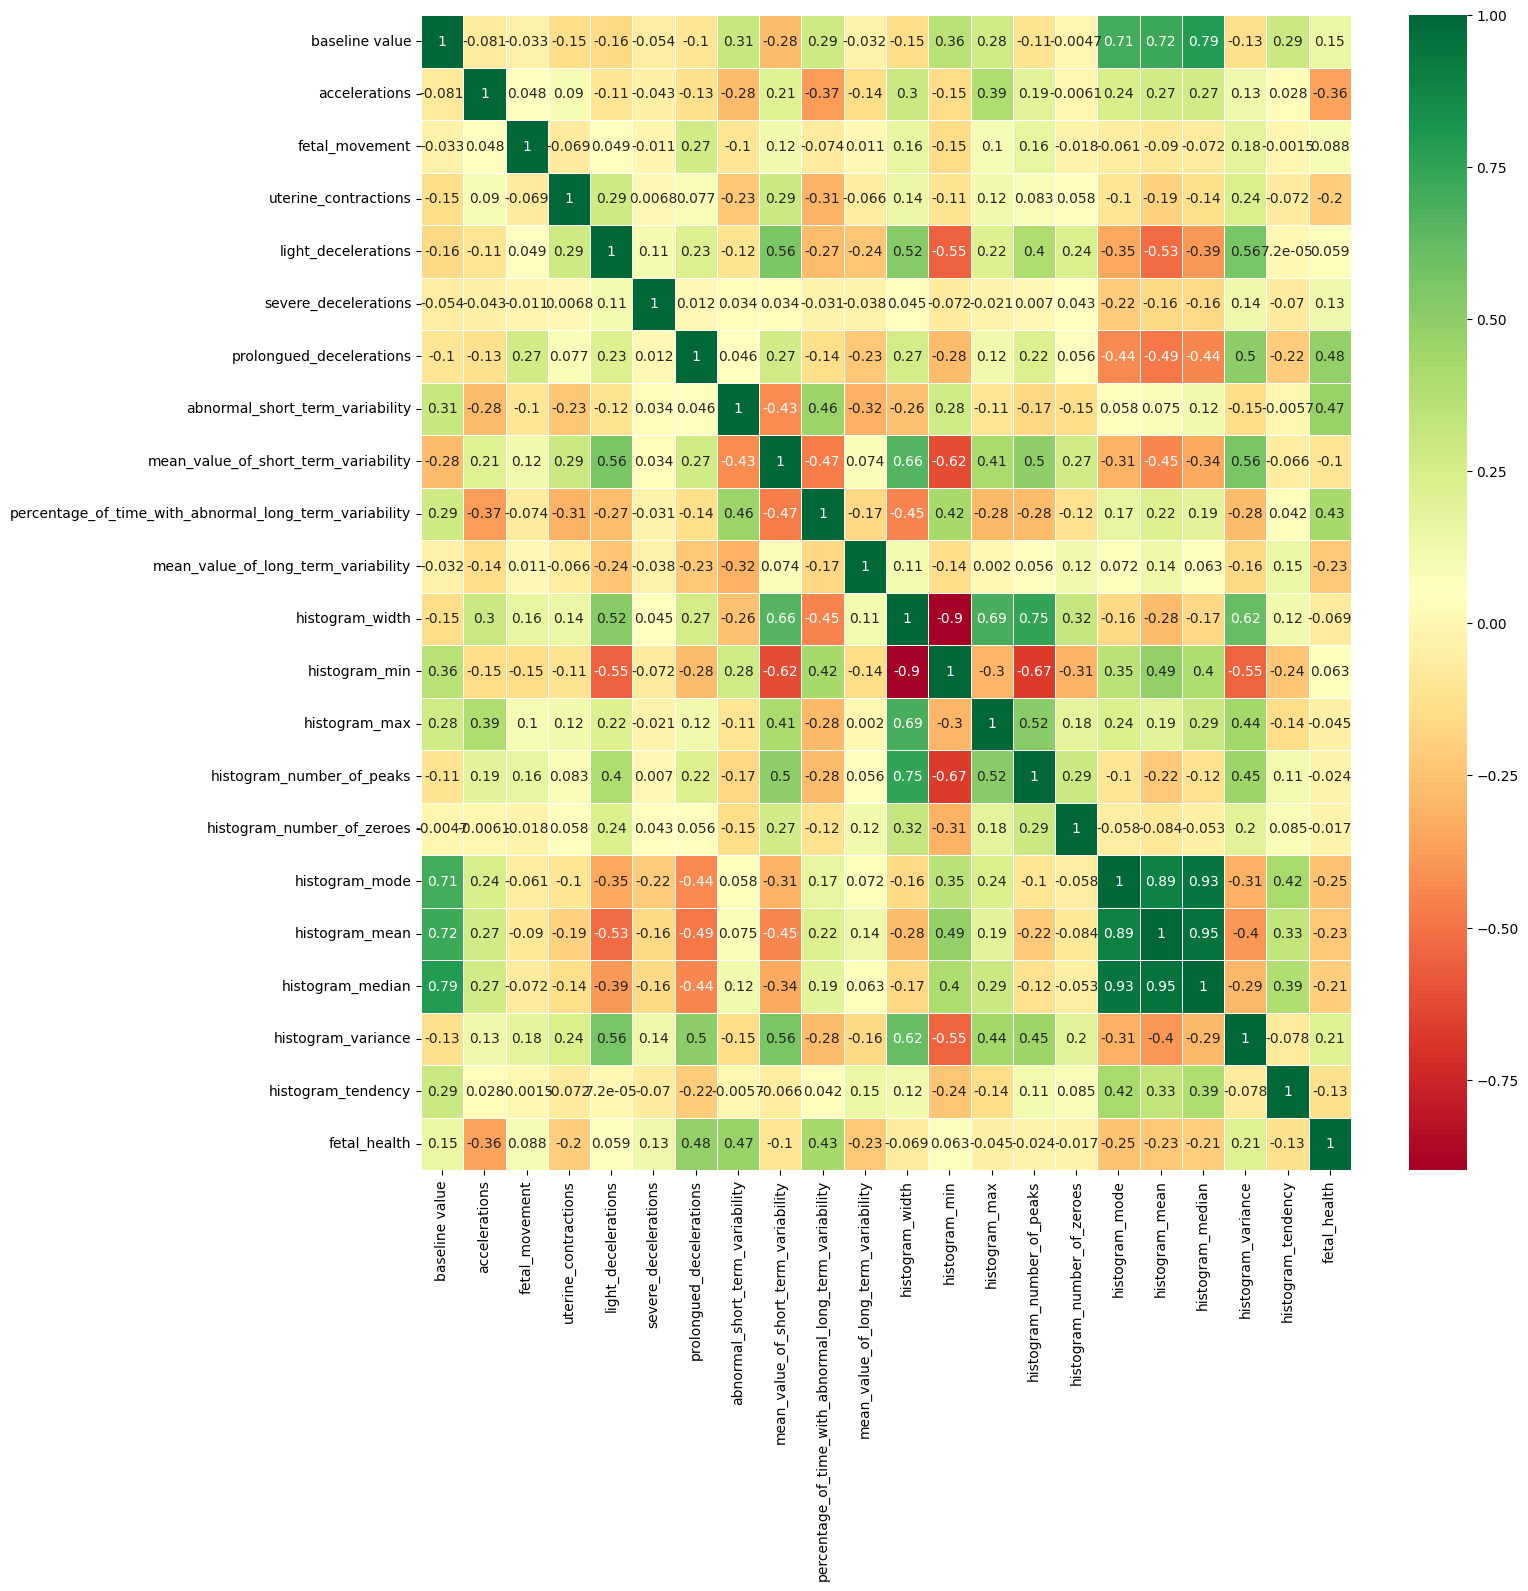

In [168]:
plt.figure(figsize=(15,15))
sns.heatmap(df_fh.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)

### 2.5 Data Preprocessing

#### 2.5.1 Check for missing value

In [169]:
df_fh.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### 2.5.2 Choose categorical variables and independent variables

In [170]:
X = df_fh.iloc[:, :-1]  # Chọn tất cả các cột trừ cột cuối cùng
y = df_fh["fetal_health"]

## 3.Build Model

### 3.1 Split data sets

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

### 3.2 Logistic Model vs Logistic Model with Gradient Descent and Regularization

In [172]:
#logistic
lr_gd_r = LogisticRegression(solver='saga', penalty='l2', max_iter=2500)
lr_gd_r.fit(X_train,y_train)
# Logistic Model with Gradient Descent and Regularization
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\hdang\.virtualenvs\machinelearning-lTTH8rYd\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hdang\.virtualenvs\machinelearning-lTTH8rYd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 3.3 Predicting Logistic Model and  Logistic Model with Gradient Descent and Regularization

In [173]:
y_pred_gd_r=lr_gd_r.predict(X_test)
y_pred=lr.predict(X_test)


### 3.4 Evaluating Logistic Model with Gradient Descent and Regularization

In [174]:
accuracy_gd_r=accuracy_score(y_pred_gd_r,y_test)
print(f"Accuracy_gd_r:{accuracy_gd_r:.4f}")
precision_gd_r=precision_score(y_pred_gd_r,y_test,average="weighted")
print(f"Precision_gd_r:{precision_gd_r:.4f}")
recall_gd_r=recall_score(y_pred_gd_r,y_test,average="weighted")
print(f"Recall_gd_r:{recall_gd_r:.4f}")
f1score_gd_r=f1_score(y_pred_gd_r,y_test,average="weighted")
print(f"f1score_gd_r:{f1score_gd_r:.4f}")

Accuracy_gd_r:0.8762
Precision_gd_r:0.8945
Recall_gd_r:0.8762
f1score_gd_r:0.8823


### 3.5 Evaluating Logistic Model

In [175]:
accuracy=accuracy_score(y_pred,y_test)
print(f"Accuracy:{accuracy:.4f}")
precision=precision_score(y_pred,y_test,average="weighted")
print(f"Precision:{precision:.4f}")
recall=recall_score(y_pred,y_test,average="weighted")
print(f"Recall:{recall:.4f}")
f1score=f1_score(y_pred,y_test,average="weighted")
print(f"f1score:{f1score:.4f}")

Accuracy:0.8495
Precision:0.8787
Recall:0.8495
f1score:0.8600
